In [23]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import Counter
import ipywidgets as widgets
from ipywidgets import interact

# 1. Random Variables

# Q1. (Mandatory)

In [1]:
import torch
from torch.distributions import Categorical

dice = Categorical(torch.ones(6) / 6)

def roll_dice():
    a = dice.sample().item() + 1
    b = dice.sample().item() + 1
    return a + b

def simulate_rolls(n=10000):
    count_7 = 0
    count_2_or_12 = 0
    for _ in range(n):
        r = roll_dice()
        if r == 7:
            count_7 += 1
        if r == 2 or r == 12:
            count_2_or_12 += 1
    p1 = count_7 / n
    p2 = count_2_or_12 / n
    
    print("Experimental probability of sum 7:", round(p1, 3))
    print("Experimental probability of sum 2 or 12:", round(p2, 3))
    print(" ")
    print("Theoretical probability of sum 7: 6/36 = 0.167")
    print("Theoretical probability of sum 2 or 12: 2/36 = 0.056")

simulate_rolls()

Experimental probability of sum 7: 0.163
Experimental probability of sum 2 or 12: 0.053
 
Theoretical probability of sum 7: 6/36 = 0.167
Theoretical probability of sum 2 or 12: 2/36 = 0.056


# Q2. (Optional)

In [2]:
import torch
from torch.distributions import Bernoulli

coin = Bernoulli(probs=0.5)

def coin_toss(n):
    flips = []
    for _ in range(n):
        toss = int(coin.sample().item())
        if toss == 1:
            flips.append('H')
        else:
            flips.append('T')
    return flips

def count_heads(flips):
    count = 0
    for i in flips:
        if i == 'H':
            count += 1
    return count

tosses = coin_toss(10)
num_heads = count_heads(tosses)

print("Coin tosses:", tosses)
print("Number of heads:", num_heads)

Coin tosses: ['H', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H']
Number of heads: 5


# Q3. (Optional)

In [3]:
import torch
from torch.distributions import Bernoulli

coin = Bernoulli(probs=0.5)

def coin_toss(n):
    flips = []
    for _ in range(n):
        toss = int(coin.sample().item())
        if toss == 1:
            flips.append('H')
        else:
            flips.append('T')
    return flips

def count_heads(flips):
    count = 0
    for i in flips:
        if i == 'H':
            count += 1
    return count

flips = coin_toss(4)
num_heads_4 = count_heads(flips)

print("Coin tosses:", flips)
print("Number of heads:", num_heads_4)

def check_inverse_mapping(flips, a):
    if count_heads(flips) == a:
        print(f"X(ξ) = {a} is True")
    else:
        print(f"X(ξ) = {a} is False")

check_inverse_mapping(flips, 2)

Coin tosses: ['H', 'H', 'T', 'T']
Number of heads: 2
X(ξ) = 2 is True


# 2. Probalility Mass function

# Q1. (Mandatory)

In [5]:
import torch

def is_valid_pmf():
    x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
    fx = x**2 - 6*x + 10
    if torch.all(fx >= 0):
        total = fx.sum()
        c = 1 / total
        prob_sum = (c * fx).sum()
        if round(prob_sum.item(), 3) == 1.0:
            print("The function is a valid PMF with c =", round(c.item(), 3))
            return round(c.item(), 3)
        else:
            print("Sum of probabilities is", round(prob_sum.item(), 3), "which is not equal to 1.")
            return None
    else:
        print("Function has negative values. Not a valid PMF.")
        return None

is_valid_pmf()

The function is a valid PMF with c = 0.067


0.067

# Q2. (Optional) (Imp)

In [6]:
import torch
from torch.distributions import Bernoulli

def coin_toss(n):
    dist = Bernoulli(probs=0.5)
    return dist.sample((n,)).int()

def count_heads(flips):
    return flips.sum().item()

def simulate_pmf(trials, tosses_per_trial):
    pmf = {}
    for _ in range(trials):
        flips = coin_toss(tosses_per_trial)
        num_heads = count_heads(flips)
        if num_heads in pmf:
            pmf[num_heads] += 1
        else:
            pmf[num_heads] = 1
    for heads in pmf:
        pmf[heads] = round(pmf[heads] / trials, 3)
    return pmf

result_pmf = simulate_pmf(1000, 100)

for heads in sorted(result_pmf):
    print("Heads =", heads, "Probability =", result_pmf[heads])

Heads = 35 Probability = 0.001
Heads = 36 Probability = 0.001
Heads = 37 Probability = 0.003
Heads = 38 Probability = 0.004
Heads = 39 Probability = 0.008
Heads = 40 Probability = 0.015
Heads = 41 Probability = 0.018
Heads = 42 Probability = 0.021
Heads = 43 Probability = 0.037
Heads = 44 Probability = 0.048
Heads = 45 Probability = 0.041
Heads = 46 Probability = 0.057
Heads = 47 Probability = 0.066
Heads = 48 Probability = 0.081
Heads = 49 Probability = 0.058
Heads = 50 Probability = 0.09
Heads = 51 Probability = 0.087
Heads = 52 Probability = 0.068
Heads = 53 Probability = 0.078
Heads = 54 Probability = 0.055
Heads = 55 Probability = 0.057
Heads = 56 Probability = 0.029
Heads = 57 Probability = 0.022
Heads = 58 Probability = 0.016
Heads = 59 Probability = 0.013
Heads = 60 Probability = 0.011
Heads = 61 Probability = 0.008
Heads = 62 Probability = 0.003
Heads = 63 Probability = 0.004


# Q3. (Optional)

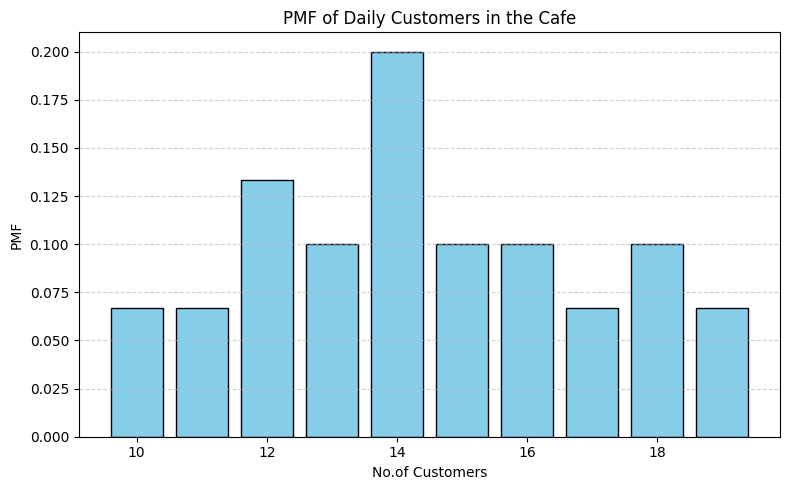

The most common number of daily customers is: 14


In [7]:
import torch
import matplotlib.pyplot as plt

customer_counts = torch.tensor([12, 15, 14, 10, 18, 16, 14, 12, 15, 11, 
                                17, 14, 13, 19, 12, 18, 14, 10, 16, 15, 
                                14, 13, 17, 12, 18, 16, 14, 11, 19, 13])

unique_counts, counts = torch.unique(customer_counts, return_counts=True)
pmf = counts.float() / customer_counts.size(0)

plt.figure(figsize=(8, 5))
plt.bar(unique_counts.tolist(), pmf.tolist(), color='skyblue', edgecolor='black')
plt.xlabel("No.of Customers")
plt.ylabel("PMF")
plt.title("PMF of Daily Customers in the Cafe")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

most_common = unique_counts[torch.argmax(pmf)].item()
print("The most common number of daily customers is:", most_common)

# 3. Cumulative Distribution Function

# Q1. (Mandatory)

In [8]:
import torch

x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
pmf = x / 15

cdf = torch.cumsum(pmf, dim=0)


for i in range(len(x)):
    print(f"x = {int(x[i])},\tPMF = {round(pmf[i].item(), 3)},\tCDF = {round(cdf[i].item(), 3)}")

print("\nVerifying the relationship between PMF and CDF:\n")
print(f"P(X=1) = {round(pmf[0].item(), 3)}, F(1) = {round(cdf[0].item(), 3)}")
for i in range(1, len(x)):
    diff = cdf[i] - cdf[i - 1]
    print(f"P(X={int(x[i])}) = {round(pmf[i].item(), 3)}, F({int(x[i])}) - F({int(x[i]-1)}) = {round(diff.item(), 3)}")

x = 1,	PMF = 0.067,	CDF = 0.067
x = 2,	PMF = 0.133,	CDF = 0.2
x = 3,	PMF = 0.2,	CDF = 0.4
x = 4,	PMF = 0.267,	CDF = 0.667
x = 5,	PMF = 0.333,	CDF = 1.0

Verifying the relationship between PMF and CDF:

P(X=1) = 0.067, F(1) = 0.067
P(X=2) = 0.133, F(2) - F(1) = 0.133
P(X=3) = 0.2, F(3) - F(2) = 0.2
P(X=4) = 0.267, F(4) - F(3) = 0.267
P(X=5) = 0.333, F(5) - F(4) = 0.333


# Q2. (Optional)

CDF values for a biased 6-sided die:
X ≤ 1 : 0.05
X ≤ 2 : 0.15
X ≤ 3 : 0.3
X ≤ 4 : 0.5
X ≤ 5 : 0.75
X ≤ 6 : 1.0


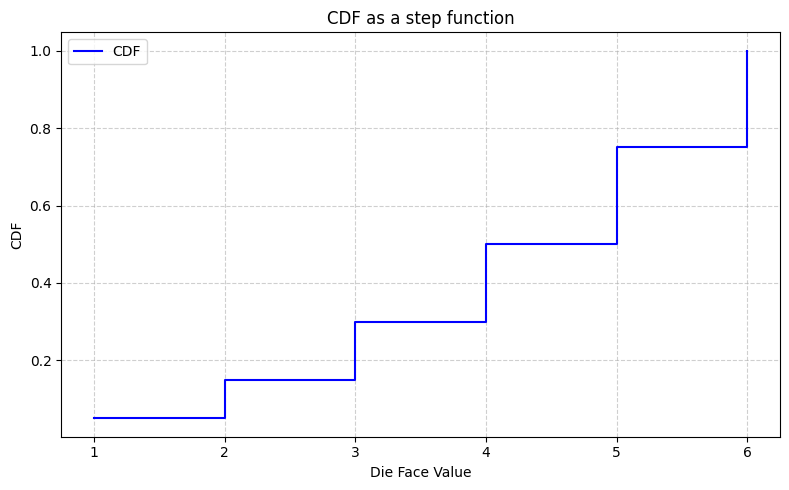

In [9]:
import torch
import matplotlib.pyplot as plt

def compute_cdf(values, pmf):
    values = torch.tensor(values, dtype=torch.float)
    pmf = torch.tensor(pmf, dtype=torch.float)
    sorted_vals, indices = torch.sort(values)
    sorted_pmf = pmf[indices]
    cdf = torch.cumsum(sorted_pmf, dim=0)
    return sorted_vals.tolist(), cdf.tolist()

values = [3, 1, 6, 2, 5, 4]
pmf = [0.15, 0.05, 0.25, 0.10, 0.25, 0.20]

sorted_vals, cdf_vals = compute_cdf(values, pmf)

print("CDF values for a biased 6-sided die:")
for val, prob in zip(sorted_vals, cdf_vals):
    print(f"X ≤ {int(val)} : {round(prob, 3)}")

plt.figure(figsize=(8, 5))
plt.step(sorted_vals, cdf_vals, where='post', color='blue', label='CDF')
plt.xlabel("Die Face Value")
plt.ylabel("CDF")
plt.title("CDF as a step function")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(sorted(sorted_vals))
plt.legend()
plt.tight_layout()
plt.show()

# Q3. (Optional)

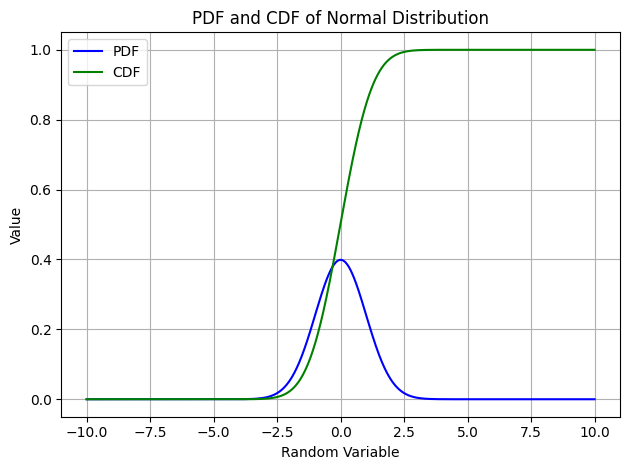

In [10]:
import torch
import matplotlib.pyplot as plt

def pdf(x, mu, sigma):
    return (1 / (torch.sqrt(torch.tensor(2 * torch.pi)) * sigma)) * torch.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

x = torch.linspace(-10, 10, 1000)
mu = 0.0
sigma = 1.0
pdf_values = pdf(x, mu, sigma)
cdf_values = torch.cumsum(pdf_values, dim=0) * (x[1] - x[0])  #HOW TO APPLY INTEGRATION ?

plt.plot(x, pdf_values, label='PDF', color='blue')
plt.plot(x, cdf_values, label='CDF', color='green')
plt.xlabel('Random Variable')
plt.ylabel('Value')
plt.title('PDF and CDF of Normal Distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Expectation

# Q1. (Mandatory) 

In [11]:
import torch

trials = 10000
flips = torch.randint(0, 2, (trials, 3))
heads = flips.sum(dim=1)

rewards = torch.where(heads == 3, 8.0, torch.where(heads == 2, 1.0, 0.0))
net_gains = rewards - 1.5
average_net_gain = net_gains.mean().item()

theoretical_expected_net_gain = (1/8)*8 + (3/8)*1 - 1.5

print("Average Net Gain:", round(average_net_gain, 3))
print("Theoretical Expected Net Gain:", round(theoretical_expected_net_gain, 3))


Average Net Gain: -0.129
Theoretical Expected Net Gain: -0.125


# Q2. (Optional)

In [12]:
import torch

def compute_expected_value(pmf):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    return (outcomes * probabilities).sum().item()

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
expected_value = compute_expected_value(pmf)
print("Expected value:", round(expected_value, 3))

Expected value: 2.3


# Q3. (Optional)

In [13]:
import torch

def compute_expected_value_of_function(pmf, g):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    gx = g(outcomes)
    expected_value = torch.sum(gx * probabilities)
    return expected_value

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
g = lambda x: x**2

expected_value = compute_expected_value_of_function(pmf, g)
print("Expected value of a function g(x): ", round(expected_value.item(), 3))

Expected value of a function g(x):  5.9


# 5. Moments and Variance

# Q1. (Mandatory)

In [14]:
import torch

def compute_variance(pmf):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    mean = torch.sum(outcomes * probabilities)
    squared_diff = (outcomes - mean) ** 2
    variance = torch.sum(squared_diff * probabilities)
    return variance

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
variance = compute_variance(pmf)
print("Variance: ", round(variance.item(), 3))

Variance:  0.61


# Q2. (Optional)

In [15]:
import torch

def compute_moment(pmf, k):
    outcomes = torch.tensor(list(pmf.keys()), dtype=torch.int64)
    probabilities = torch.tensor(list(pmf.values()), dtype=torch.float)
    moment = torch.sum((outcomes ** k) * probabilities)
    return moment

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
k = 3
moment = compute_moment(pmf, k)
print("k-th Moment: ", round(moment.item(), 3))

k-th Moment:  16.1


# Q3. (Optional)

In [16]:
import torch

def estimate_variance(f, a, b, N):
    dist = torch.distributions.Uniform(a, b)
    x = dist.sample((N,))
    fx = f(x)
    return fx.var(unbiased=False) #IMP TO NOTICE

f = lambda x: x**2
a, b, N = 0, 1, 10000
variance = estimate_variance(f, a, b, N)
print("Variance of given function f(x): ", round(variance.item(), 3))

Variance of given function f(x):  0.088


# 6. Bernoulli Random Variables

# Q1. (Mandatory) (Doubt)

In [17]:
import torch

def bernoulli_trial(p):
    return int(torch.bernoulli(torch.tensor(p)).item())

p = 0.7
outcome = bernoulli_trial(p)
print("Outcome: ", outcome)

Outcome:  1


# Q2. (Optional)

In [18]:
import torch

def bernoulli_stats(p):
    p = torch.tensor(p)
    expectation = p
    variance = p * (1 - p)
    return expectation.item(), variance.item()

p = 0.5
expectation, variance = bernoulli_stats(p)
print(f"Expectation: {expectation}, Variance: {variance}")

Expectation: 0.5, Variance: 0.25


# Q3. (Optional)

In [19]:
import torch

def simulate_bernoulli(p, N):
    samples = torch.bernoulli(torch.full((N,), p))
    proportion = samples.mean()
    return proportion.item()

p = 0.3
N = 1000
proportion = simulate_bernoulli(p, N)
print("Proportion of Successes: ", round(proportion, 3))

Proportion of Successes:  0.312


 # 7. **Binomial Distribution**

#### Q1. (**Mandatory**)
Write a Python function that simulates a Binomial random variable. The function should take three inputs:
- `n` (number of trials)
- `p` (probability of success)
- `size` (number of random values to generate)

Plot a histogram of the generated values for `n=10`, `p=0.5`, and `size=1000`.

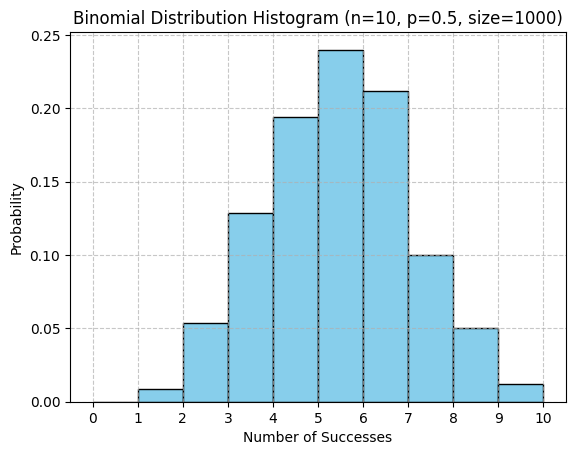

In [21]:
def binomial(n, p, size):
    binom_dist = torch.distributions.Binomial(total_count=n, probs=p)
    return binom_dist.sample((size,)).int() 
n = 10
p = 0.5
size = 1000

data = binomial(n, p, size).numpy()  

plt.hist(data, bins=range(n+1), density=True, color='skyblue', edgecolor='black')
plt.xticks(range(n+1))
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution Histogram (n={n}, p={p}, size={size})')
plt.grid( linestyle='--', alpha=0.7)
plt.show()

#### Q2. (Optional)
Write a Python program that:
1. Computes the probability mass function (PMF) of a Binomial distribution.
2. Plots the PMF for `n=20` and `p=0.3`.

,x,P(x)
0,0,0.00080
1,1,0.00684
2,2,0.02785
3,3,0.07160
4,4,0.13042
5,5,0.17886
6,6,0.19164
7,7,0.16426
8,8,0.11440
9,9,0.06537


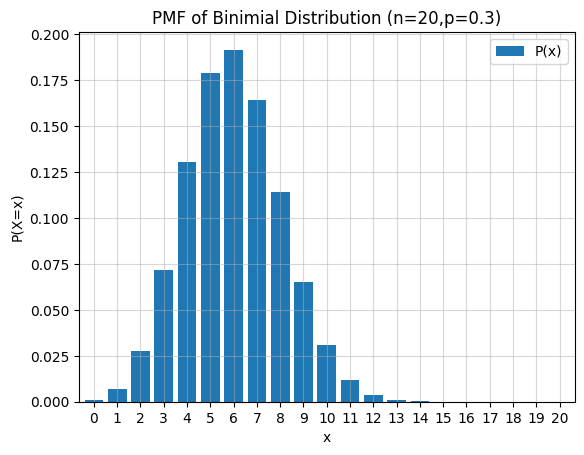

In [24]:
def binomial_pmf(n,p):
    
    x=torch.arange(0,n+1)
    dist=torch.distributions.Binomial(n,p)
    y=dist.log_prob(x).exp()
    
    df_binomial=pd.DataFrame({'x': x.numpy(),'P(x)':y.numpy().round(5)})
    display(df_binomial)
    return df_binomial

n=20
p=0.3

binomial_pmf(n,p).plot(kind="bar",x='x',y="P(x)",rot=0,width=0.8)
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.grid(alpha=0.5)
plt.title('PMF of Binimial Distribution (n=20,p=0.3)')
plt.show()

#### Q3. (Optional)
Simulate a fair coin being flipped 100 times and count the number of heads. Repeat this experiment 1000 times and visualize the distribution using a histogram. Explain how this relates to the Binomial distribution.

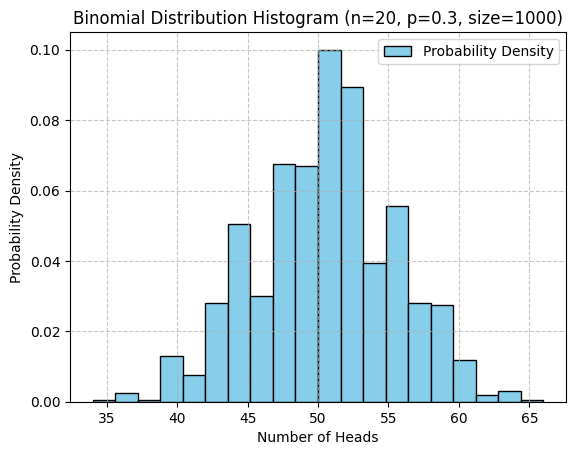

In [25]:
total_count=100
head_prob=0.5
size=1000

data = binomial(total_count, head_prob, size).numpy()  

plt.hist(data, bins=20, density=True, color='skyblue', edgecolor='black',label='Probability Density')
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.title(f'Binomial Distribution Histogram (n={n}, p={p}, size={size})')
plt.grid( linestyle='--', alpha=0.7)
plt.legend()

plt.show()

# 8. **Geometric Distribution**

#### Q1. (**Mandatory**)
#### Simulating Geometric Distribution
Write a Python function that generates random numbers from a Geometric distribution. The function should take:
- `p` (probability of success)
- `size` (number of values to generate)

Plot a histogram for `p=0.3` and `size=1000`.

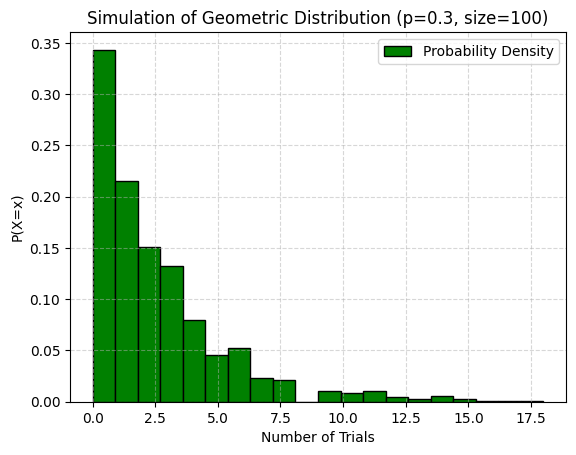

In [26]:
def geometric_dist(p,size):
    dist=torch.distributions.Geometric(probs=p)
    return dist.sample((size,)).int()
p=0.3
size=1000
data=geometric_dist(p,size).numpy()

plt.hist(data,density=True,color='g',edgecolor='k',bins=20,label='Probability Density')
plt.xlabel('Number of Trials')
plt.ylabel('P(X=x)')
plt.title('Simulation of Geometric Distribution (p=0.3, size=100)')
plt.grid(linestyle='--',alpha=0.5)
plt.legend()

plt.show()

#### Q2. (Optional)
#### Expected Number of Trials
Create an interactive Python program that uses `ipywidgets` and `matplotlib` to visualize the probability mass function (PMF) of the Geometric distribution. Users can adjust the probability of success \( p \) and the maximum number of trials \( k \) to display.

In [27]:
@interact
def Geometric_Distribution(p=(0.1,1,0.1),k=(1,50,1)):
    
    trials=torch.arange(1,k+1)
    geo_dist = torch.distributions.Geometric(torch.tensor(p))
    pmf_GD = geo_dist.log_prob(trials).exp()
    
    plt.bar(trials.numpy(),pmf_GD.numpy(),color='orange',edgecolor='k',alpha=0.7,label='PMF for (p,k)')
    plt.xlabel('Number of Trials to get Success')
    plt.ylabel('PMF')
    plt.title('Interactive PMF of Geometric Distribution (p = (0.1,1,0.1), k= (1,50,1))')
    plt.grid(alpha=0.5)
    plt.legend()
    plt.tight_layout()
  
    return  plt.show()

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, min=0.1), IntSlider(value=25, descripti…

#### Q3. (Optional)
#### Estimating `p` from Sample Data
Generate a dataset of 500 Geometric random variables with `p=0.4`. Then, estimate `p` from the data using the formula:

$$\hat{p} = \frac{1}{\text{sample mean}}$$

Compare the estimated value with the true `p=0.4` and compute the percentage error.

In [36]:
p = 0.4

dist = torch.distributions.Geometric(probs=p)
data=dist.sample((500,)).int()

sample_mean = round(data.float().mean().item(),4)

theoretical_mean = 1/p

print(f'sample_mean ({sample_mean}), theoretical_mean ({theoretical_mean})')
print()

print(f' Percentage error (%) = {round(abs(100*(sample_mean-theoretical_mean)/theoretical_mean),2)} %')

sample_mean (1.66), theoretical_mean (2.5)

 Percentage error (%) = 33.6 %


# 9. **Poisson Distribution**

#### Q1. (**Mandatory**)
Write a Python function that generates Poisson random variables. The function should take:
- `λ` (expected number of events per interval)
- `size` (number of values to generate)

Plot a histogram for `λ=5` and `size=1000`.

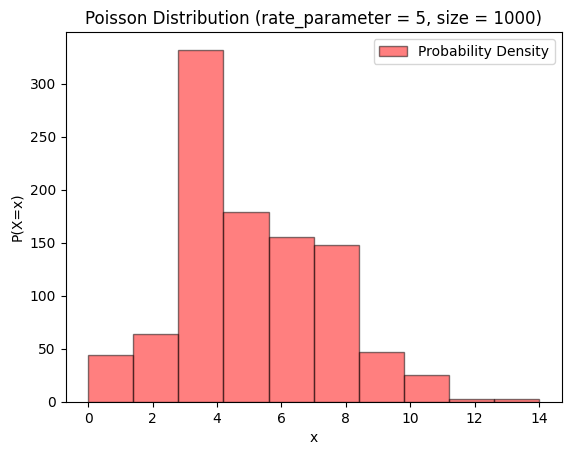

In [45]:
def poisson_rv(rate_param, size):
    dist = torch.distributions.Poisson(rate_param)
    return dist.sample((size,)).int()

rate_param = 5
size = 1000
data = poisson_rv(rate_param, size).numpy()

plt.hist(data, color = 'r', alpha = 0.5,edgecolor = 'k', label = 'Probability Density')
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.title('Poisson Distribution (rate_parameter = 5, size = 1000)')
plt.legend()
plt.show()

#### Q2. (Optional)
Generate 1000 samples from a Binomial distribution with `n=100` and `p=0.05`. Then, generate 1000 samples from a Poisson distribution with `λ=n*p=5`. Compare their histograms and explain why the Poisson distribution approximates the Binomial distribution for large `n` and small `p`.

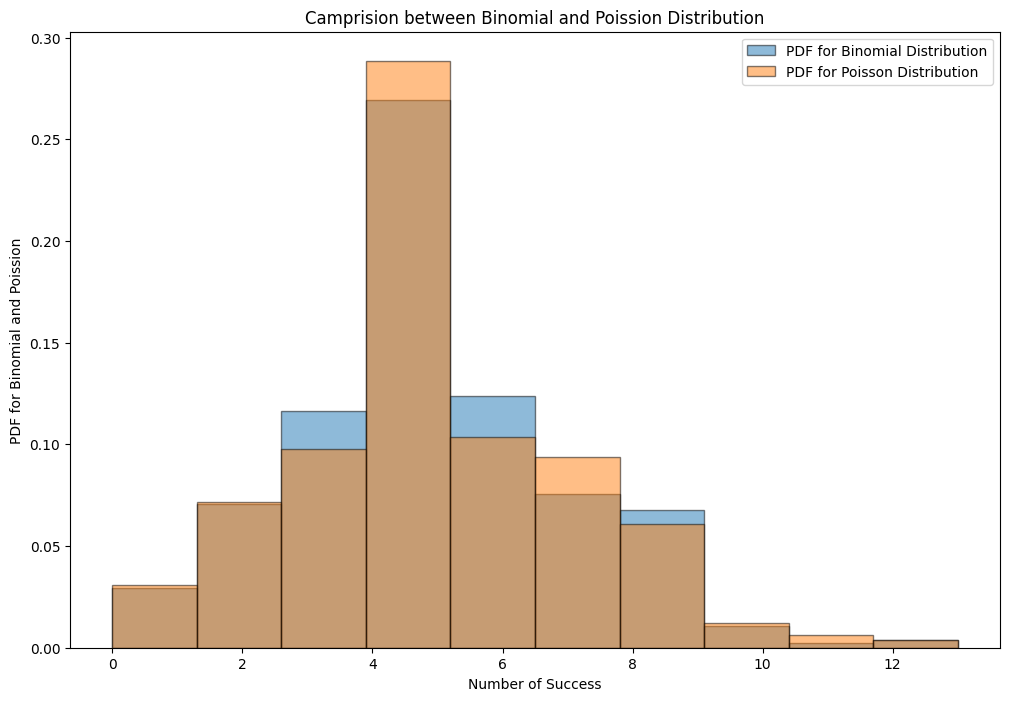

In [50]:
data1 = binomial(100,0.05,1000).numpy()
data2 = poisson_rv(5,1000).numpy()

plt.figure(figsize=(12,8))
plt.hist(data1,alpha = 0.5,edgecolor = 'k',label = 'PDF for Binomial Distribution',density =True)
plt.hist(data2,alpha=0.5,edgecolor = 'k',label = 'PDF for Poisson Distribution',density =True)
plt.xlabel('Number of Success')
plt.ylabel('PDF for Binomial and Poission')
plt.title('Camprision between Binomial and Poission Distribution')
plt.legend()
plt.show()

#### Q3. (Optional)
A call center receives calls at an average rate of 3 calls per minute. Assume the number of calls follows a Poisson distribution.
1. Compute the probability of receiving exactly 5 calls in a minute.
2. Compute the probability of receiving at most 5 calls.

In [51]:
rate_param = avg_rate = 3

dist = torch.distributions.Poisson(rate_param)
x = torch.tensor(5)
prob_five = dist.log_prob(x).exp()

print(f'Probability of receiving exactly 5 calls in a mintue = {round(prob_five.item(),4)}')


Probability of receiving exactly 5 calls in a mintue = 0.1008


In [52]:
x_range = torch.arange(0,6,1)

prob = dist.log_prob(x_range).exp()
cum_prob = prob.sum()

print(f'Probability of receiving at most 5 calls in a minutes = {cum_prob.item():.4f}')

Probability of receiving at most 5 calls in a minutes = 0.9161


# 10. **Probability Density function**

#### Q1. (**Mandatory**)
Implement a piecewise PDF defined as:

$$
f(x) =
\begin{cases}
0.5x & \text{if } 0 \leq x \leq 1 \\
2 - x & \text{if } 1 < x \leq 2 \\
0 & \text{otherwise}
\end{cases}
$$

Compute P(0.5≤X≤1.5) analytically and verify using numerical integration.

Plot the PDF and highlight the area under the curve for the computed probability.

Numerical Integration of P(0.5<=X<=1.5) = 0.5625


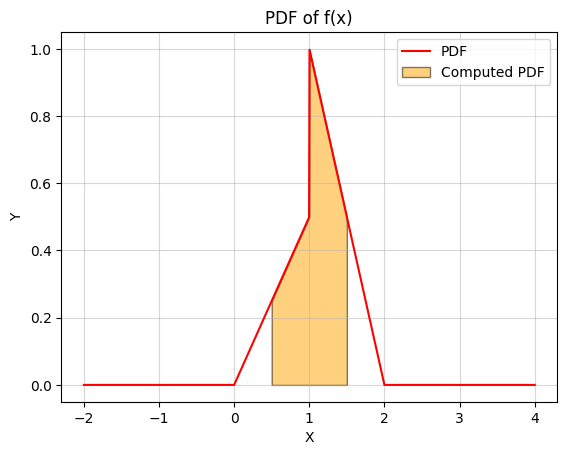

In [53]:
def pdf(x):
    if 0<=x<=1:
        return 0.5*x
    elif 1<x<=2:
        return 2-x
    else:
        return 0
x = torch.linspace(0.5,1.5,2000)
y = torch.tensor([pdf(i.item()) for i in x])
integral = torch.trapz(y,x)
print(f'Numerical Integration of P(0.5<=X<=1.5) = {integral}')

x_range = torch.linspace(-2,4,1000)
y_range = torch.tensor([pdf(i.item()) for i in x_range])

plt.plot(x_range, y_range, label ='PDF', color = 'r')
plt.fill_between(x,y,color = 'orange',alpha = 0.5,label = 'Computed PDF',edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PDF of f(x)')
plt.legend()
plt.grid(alpha = 0.5)
plt.show()


#### Q2. (Optional)
Write a Python program to estimate the probability density function of a given dataset using a histogram.

* Generate or load a dataset (e.g., from a normal distribution with mean = 0 and standard deviation = 1, sample size = 1000).
* Compute the histogram with an appropriate number of bins.
* Normalize the histogram so that it represents a probability density function and plot the estimated PDF.

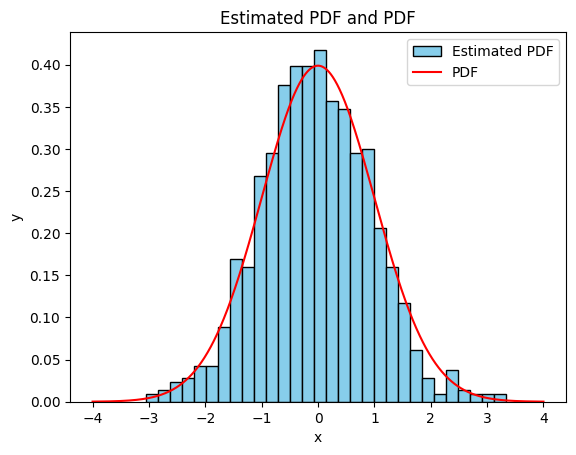

In [57]:
dist = torch.distributions.Normal(0,1)
data = dist.sample((1000,))

torch.manual_seed(10)
x = torch.linspace(-4,4,1000)
y = dist.log_prob(x).exp()

plt.hist(data, color = 'skyblue', edgecolor = 'k', bins=30, density =True, label= 'Estimated PDF')
plt.plot(x, y, color = 'r', label= 'PDF')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Estimated PDF and PDF')
plt.show()

#### Q3. (Optional)
Random variable X defined as:

Discrete PMF: P(X=0)=0.2.

Continuous PDF: For 1≤x≤3, f(x)=0.4.

X is undefined outside {0}∪[1,3].

* a) Confirm the total probability is 1.
* b) Compute P(1.5≤X≤2.5).

In [58]:
def F(x):
    if 1<=x<=3:
        return 0.4
    else:
        return 0

x = torch.linspace(1,3,1000)
y = torch.tensor([F(i.item())for i in x])

total_prob_continous = torch.trapz(y,x)
total_probability = total_prob_continous.item() + 0.2

print(f'Total Probability = {total_probability:4f}')

x1= torch.linspace(1.5,2.5,1000)
y1= torch.tensor([F(i.item()) for i in x1])

print()

print(f'P(1.5<=x<=2.5) = {torch.trapz(y1,x1).item():4f}')

Total Probability = 1.000000

P(1.5<=x<=2.5) = 0.400000


# 11. **Expectation(continuous)**

#### Q1. (**Mandatory**)
Implement a function to compute E[X] for a continuous random variable with a piecewise probability density function (PDF).

```python
def expectation_piecewise_pdf(intervals: list, funcs: list) -> float:
    """
    Compute E[X] for a piecewise PDF defined over intervals.
    
    Args:
        intervals: List of tuples defining intervals, e.g., [(0, 1), (1, 2)]
        funcs: List of functions corresponding to each interval's PDF
    """
    
    # Example:
    def f1(x): return x   # For 0 <= x <= 1
    def f2(x): return 2 - x  # For 1 < x <= 2
    expectation_piecewise_pdf([(0, 1), (1, 2)], [f1, f2]) ≈ 1.0


In [59]:
def expectation_piecewise_pdf(intervals: list, funcs: list) -> float:
    x1=torch.linspace(intervals[0][0],intervals[0][1],1000)
    y1=torch.tensor([funcs[0](i.item()) for i in x1])
    integral_1 = torch.trapz(y1*x1,x1).item()

    x2=torch.linspace(intervals[1][0],intervals[1][1],1000)
    y2=torch.tensor([funcs[1](i.item()) for i in x2])
    integral_2 = torch.trapz(y2*x2,x2).item()

    return integral_1+integral_2
    
    
def f1(x): return x   # For 0 <= x <= 1
def f2(x): return 2 - x  # For 1 < x <= 2

expectation_piecewise_pdf([(0, 1), (1, 2)], [f1, f2]) 


0.9999999701976776

#### Q2. (Optional)
Compute E[g(X)] for a continuous random variable X with PDF f(x) and transformation g, using numerical integration.
```python
def expectation_transform(g, pdf, lower: float, upper: float) -> float:
    """
    Compute E[g(X)] where X has the given PDF.
    
    Args:
        g: Function to transform X (e.g., lambda x: x**2)
        pdf: Probability density function of X
        lower: Lower bound of X's support
        upper: Upper bound of X's support
    """
    # Example:
    f = lambda x: 2*x  # PDF for X ~ Uniform(0,1) transformed by Y=2X
    expectation_transform(lambda x: x, f, 0, 1) ≈ 2/3

In [60]:
def expectation_transform(g, pdf, lower: float, upper: float) -> float:
    """
    Compute E[g(X)] where X has the given PDF.
    
    Args:
        g: Function to transform X (e.g., lambda x: x**2)
        pdf: Probability density function of X
        lower: Lower bound of X's support
        upper: Upper bound of X's support
    """
    x_range = torch.linspace(lower,upper,1000)
    y1 = torch.tensor([g(i.item()) for i in x_range])
    y2 = torch.tensor([pdf(j.item()) for j in x_range])
    integral = torch.trapz(y1*y2, x_range)
    return integral.item()
    # Example:
f = lambda x: 2*x  # PDF for X ~ Uniform(0,1) transformed by Y=2X
print(f'E[g(X)] = {expectation_transform(lambda x: x, f, 0, 1):4f}')

E[g(X)] = 0.666667


# **12. Cumulative distribution function for continuous random variables**

#### Q1. (**Mandatory**)
Write a function to compute and plot the Cumulative Distribution Function (CDF) for a Uniform continuous random variable
𝑋 ∼ 𝑈(𝑎,𝑏) given the probability density function (PDF):


$$ f_X(x)= \begin{cases}
\frac{1}{b−a} & ,\text a≤x≤b \\
0 & ,\text {otherwise}
\end {cases}
$$

Your function should:

1. Take a and b (where 𝑎 < 𝑏) as inputs.
2. Compute the CDF $𝐹_𝑋(𝑥)$
3. Generate an array of 𝑥-values and compute $ 𝐹_𝑋(𝑥) $.
4. Plot the CDF curve using Matplotlib.​

 0
 1


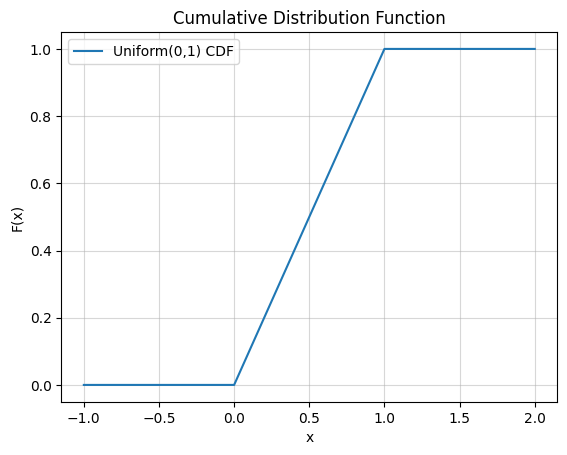

In [61]:
def CDF_f(a,b):
    x_range = torch.linspace(a-1,b+1,1000)
    y = torch.where(x_range<a,0,torch.where(x_range>b,1,(x_range-a)/(b-a)))
    
    plt.plot(x_range, y,label=f'Uniform({a},{b}) CDF')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title('Cumulative Distribution Function')
    plt.grid(alpha=0.5)
    plt.legend()
    return plt.show()

a=int(input())
b=int(input())
CDF_f(a,b)

#### Q2. (Optional)
A continuous random variable 𝑋 follows an Exponential distribution with a given rate parameter 𝜆. The probability density function (PDF) of 𝑋 is:
    $$ f_X(x)=λe^{−λx} ,x≥0 $$

Your task is to derive and compute the CDF $𝐹_𝑋(𝑥)$ of the given exponential distribution for a given 𝜆.

Instructions:
1. Write a function that takes 𝑥 and 𝜆 as input and returns the cumulative distribution function (CDF) $ 𝐹_𝑋(𝑥)$.
2. Compute the CDF for different values of 𝑥 in the range [0, 5].
3. Plot the CDF curve for a given 𝜆.

 1


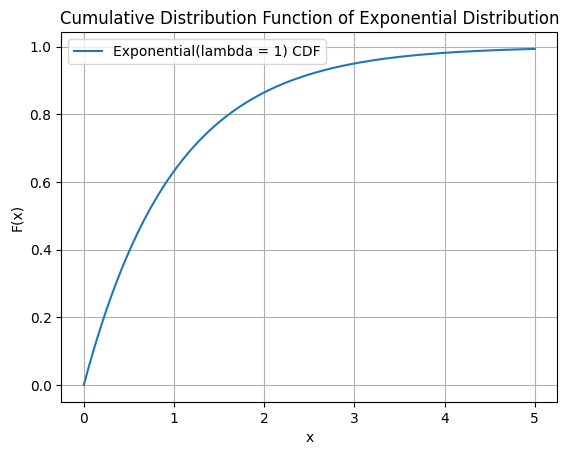

In [65]:
def CDF(x,l):
    return 1 - torch.exp(-l*x)

x = torch.linspace(0,5,1000)
l=int(input())
y=CDF(x,l)

plt.plot(x.numpy(),y.numpy(), label=f'Exponential(lambda = {l}) CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function of Exponential Distribution')
plt.grid()
plt.legend()
plt.show()

#### Q3. (Optional)
A continuous random variable 𝑋 follows an Exponential distribution with a rate parameter 𝜆. The PDF of 𝑋 is given as:
$$ 𝑓_𝑋(𝑥)=𝜆𝑒^{−𝜆𝑥},𝑥≥0 $$

Your task is to compute the probability 𝑃(1≤𝑋≤3) using two different approaches:

(a) PDF Approach:
Compute the probability using numerical integration of the PDF over the interval [1,3].

(b) CDF Approach:
Compute the probability using the CDF formula.

In [66]:
x_range = torch.linspace(1,3,1000)
dist = torch.distributions.Exponential(3)

y = dist.log_prob(x_range).exp()

pdf = torch.trapz(y, x_range)
print(f'PDF approach: {pdf:4f}')

y1 = CDF(torch.tensor([3]),3) - CDF(torch.tensor([1]),3)
print(f'CDF approach: {y1.item():4f}')

PDF approach: 0.049664
CDF approach: 0.049664


# 13. **Mean, Mode, and Median**  

#### Q1. (Optional)

In [67]:
from torch.distributions import Normal, Categorical
data = torch.tensor([1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0])

mean_value = data.mean()
median_value = data.median()

unique_values, counts = torch.unique(data, return_counts=True)
dist = Categorical(counts)
mode_value = unique_values[dist.mode]

print(f"Mean: {mean_value.item()}")
print(f"Median: {median_value.item()}")
print(f"Mode: {mode_value.item()}")

Mean: 3.125
Median: 3.0
Mode: 4.0


#### Q2. (**Mandatory**)

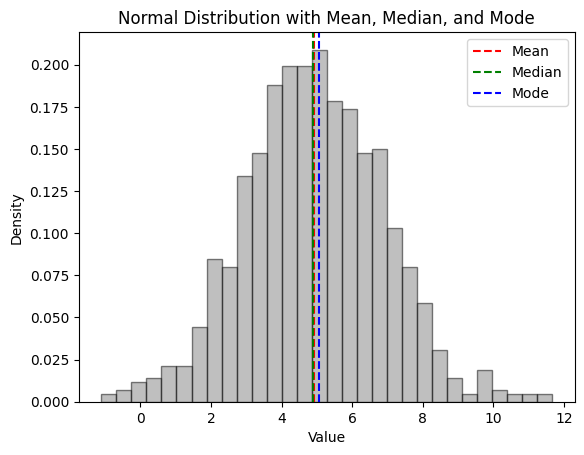

In [68]:
from torch.distributions import Normal

dist = Normal(5.0, 2.0)
sample = dist.sample((1000,))

mean_value = sample.mean()
median_value = sample.median()

hist_counts, bin_edges = torch.histogram(sample, bins=30)
mode_value = (bin_edges[torch.argmax(hist_counts)] + bin_edges[torch.argmax(hist_counts) + 1]) / 2

plt.hist(sample.numpy(), bins=30, color='gray', alpha=0.5, edgecolor='black', density=True)

plt.axvline(mean_value.item(), color='red', linestyle='--', label='Mean')
plt.axvline(median_value.item(), color='green', linestyle='--', label='Median')
plt.axvline(mode_value.item(), color='blue', linestyle='--', label='Mode')

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Normal Distribution with Mean, Median, and Mode')

plt.show()

#### Q3. (Optional)

Sample Mean: 4.981649875640869, Theoretical Mean: 5.0
Sample Median: 5.069445610046387, Theoretical Median: 5.0
Sample Mode (Approximate): 5.836207389831543, Theoretical Mode: Any value in [0,10]


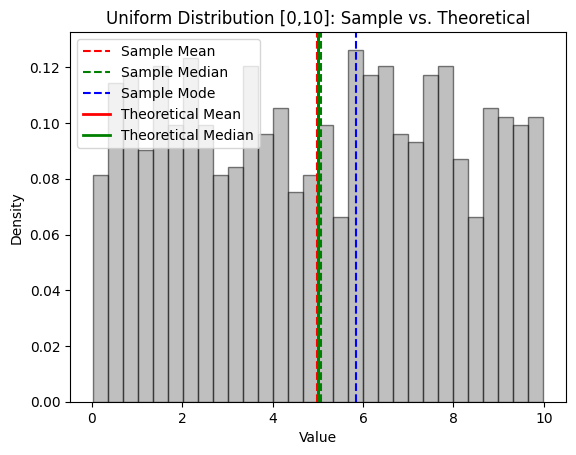

In [70]:
from torch.distributions import Uniform

dist = Uniform(0.0, 10.0)
sample = dist.sample((1000,))

mean_sample = sample.mean()
median_sample = sample.median()

hist_counts, bin_edges = torch.histogram(sample, bins=30)
mode_sample = (bin_edges[torch.argmax(hist_counts)] + bin_edges[torch.argmax(hist_counts) + 1]) / 2

mean_theoretical = 5.0
median_theoretical = 5.0

print(f"Sample Mean: {mean_sample.item()}, Theoretical Mean: {mean_theoretical}")
print(f"Sample Median: {median_sample.item()}, Theoretical Median: {median_theoretical}")
print(f"Sample Mode (Approximate): {mode_sample.item()}, Theoretical Mode: Any value in [0,10]")

plt.hist(sample.numpy(), bins=30, color='gray', alpha=0.5, edgecolor='black', density=True)

plt.axvline(mean_sample.item(), color='red', linestyle='--', label='Sample Mean')
plt.axvline(median_sample.item(), color='green', linestyle='--', label='Sample Median')
plt.axvline(mode_sample.item(), color='blue', linestyle='--', label='Sample Mode')

plt.axvline(mean_theoretical, color='red', linestyle='-', linewidth=2, label='Theoretical Mean')
plt.axvline(median_theoretical, color='green', linestyle='-', linewidth=2, label='Theoretical Median')

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Uniform Distribution [0,10]: Sample vs. Theoretical')

plt.show()

# 14. **Uniform Random Variables** 

#### Q1. (**Mandatory**)

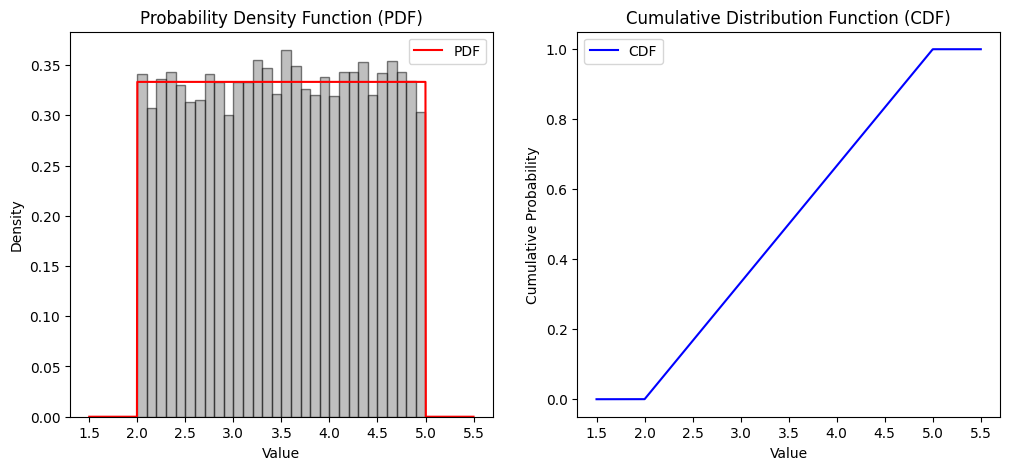

In [71]:
from torch.distributions import Uniform

dist = Uniform(2.0, 5.0)
sample = dist.sample((10000,))

x = torch.linspace(1.5, 5.5, 1000)

pdf = torch.where((x >= 2) & (x <= 5), 1 / (5 - 2), 0)
cdf = torch.where(x < 2, 0, torch.where(x > 5, 1, (x - 2) / (5 - 2)))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(sample.numpy(), bins=30, density=True, color='gray', alpha=0.5, edgecolor='black')
ax[0].plot(x.numpy(), pdf.numpy(), 'r-', label='PDF')
ax[0].set_title('Probability Density Function (PDF)')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')
ax[0].legend()

ax[1].plot(x.numpy(), cdf.numpy(), 'b-', label='CDF')
ax[1].set_title('Cumulative Distribution Function (CDF)')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Cumulative Probability')
ax[1].legend()

plt.show()

#### Q2. (Optional)

In [72]:
a, b = 2.0, 5.0

mean_theoretical = (a + b) / 2
variance_theoretical = ((b - a) ** 2) / 12

print(f"Theoretical Mean: {mean_theoretical}")
print(f"Theoretical Variance: {variance_theoretical}")

Theoretical Mean: 3.5
Theoretical Variance: 0.75


#### Q3. (Optional)

In [73]:
a, b = 2, 5

cdf = lambda x: torch.where(x < a, 0, torch.where(x > b, 1, (x - a) / (b - a)))

p_3_to_4 = cdf(torch.tensor(4.0)) - cdf(torch.tensor(3.0))

print(f"P(3 ≤ X ≤ 4): {p_3_to_4.item()}")

P(3 ≤ X ≤ 4): 0.3333333432674408


# 15. **Exponential Random Variables**

#### Q1. (**Mandatory**)

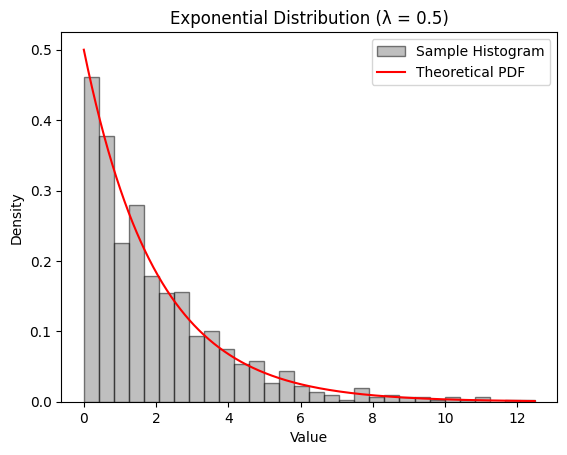

In [74]:
from torch.distributions import Exponential

lam = 0.5
dist = Exponential(lam)
sample = dist.sample((1000,))

x = torch.linspace(0, sample.max(), 1000)
pdf = lam * torch.exp(-lam * x)

plt.hist(sample.numpy(), bins=30, density=True, color='gray', alpha=0.5, edgecolor='black', label='Sample Histogram')
plt.plot(x.numpy(), pdf.numpy(), 'r-', label='Theoretical PDF')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Exponential Distribution (λ = 0.5)')
plt.legend()
plt.show()

#### Q2. (Optional)

In [75]:
lam = torch.tensor(0.5)

mean_theoretical = 1 / lam
variance_theoretical = 1 / (lam ** 2)

print(f"Theoretical Mean: {mean_theoretical.item()}")
print(f"Theoretical Variance: {variance_theoretical.item()}")

Theoretical Mean: 2.0
Theoretical Variance: 4.0


#### Q3. (Optional)

In [76]:
from torch.distributions import Exponential

lam = torch.tensor(0.5)
dist = Exponential(lam)

p_t_greater_3 = 1 - dist.cdf(torch.tensor(3.0))

print(f"P(T > 3): {p_t_greater_3.item()}")

P(T > 3): 0.22313016653060913


# 16. **Gaussian Random Variables**

#### Q1. (**Mandatory**)

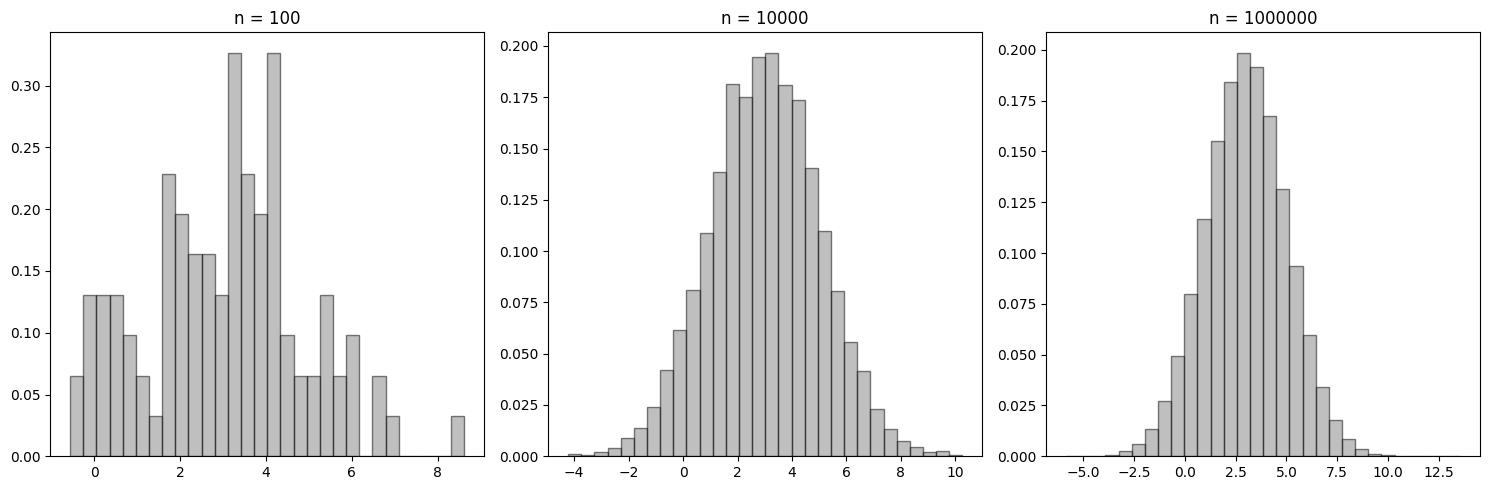

In [77]:
from torch.distributions import Normal

mu, sigma = 3.0, 2.0
sample_sizes = [100, 10000, 1000000]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

dist = Normal(mu, sigma)

axes[0].hist(dist.sample((sample_sizes[0],)).numpy(), bins=30, density=True, color='gray', alpha=0.5, edgecolor='black')
axes[0].set_title(f"n = {sample_sizes[0]}")

axes[1].hist(dist.sample((sample_sizes[1],)).numpy(), bins=30, density=True, color='gray', alpha=0.5, edgecolor='black')
axes[1].set_title(f"n = {sample_sizes[1]}")

axes[2].hist(dist.sample((sample_sizes[2],)).numpy(), bins=30, density=True, color='gray', alpha=0.5, edgecolor='black')
axes[2].set_title(f"n = {sample_sizes[2]}")

plt.tight_layout()
plt.show()


1) For n = 100, the histogram appears rough due to random variation.
2) For n = 10,000, the histogram smooths out and begins to resemble the true Gaussian shape.
3) For n = 1,000,000, the histogram closely matches the bell curve expected from a normal distribution.
4) As the sample size increases, the sample mean gets closer to 3.0 (theoretical mean).
5) The sample variance stabilizes around 4.0 (theoretical variance, since σ² = 2² = 4).
6) The law of large numbers ensures that larger samples give more accurate estimates of the true parameters.

#### Q2. (Optional)

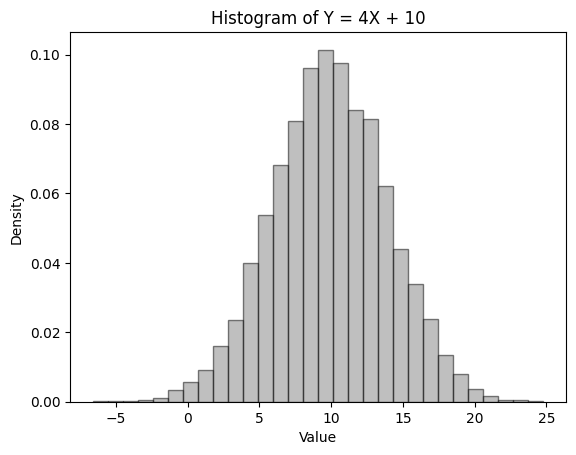

In [78]:
from torch.distributions import Normal

dist_x = Normal(0, 1)
x_samples = dist_x.sample((10000,))
y_samples = 4 * x_samples + 10

plt.hist(y_samples.numpy(), bins=30, density=True, color='gray', alpha=0.5, edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Y = 4X + 10")
plt.show()

## Distribution of Y = 4X + 10

### Given:
Let X be a standard normal (Gaussian) random variable with mean 0 and variance 1. We define a new random variable:

Y = 4X + 10

### Finding the Distribution of Y:
For a normal distribution, a linear transformation of the form Y = aX + b results in:

- New mean = a * (mean of X) + b  
- New variance = (a^2) * (variance of X)

Since X follows N(0,1), we have:
- Mean of X = 0  
- Variance of X = 1  

Applying the transformation:
- Mean of Y = 4(0) + 10 = 10  
- Variance of Y = 4^2 * 1 = 16  

Thus, Y follows a normal distribution with mean 10 and variance 16:
Y ~ N(10, 16)

### Verification by Simulation:
To verify this result, we generate 10,000 samples from X ~ N(0,1) using `torch.distributions`, transform them using Y = 4X + 10, and plot a histogram. The histogram should resemble a normal distribution with mean 10 and standard deviation 4.


#### Q3. (Optional)

Theoretical Mean of Z: 2
Empirical Mean of Z: 2.0007123947143555
Theoretical Variance of Z: 5
Empirical Variance of Z: 4.958072185516357


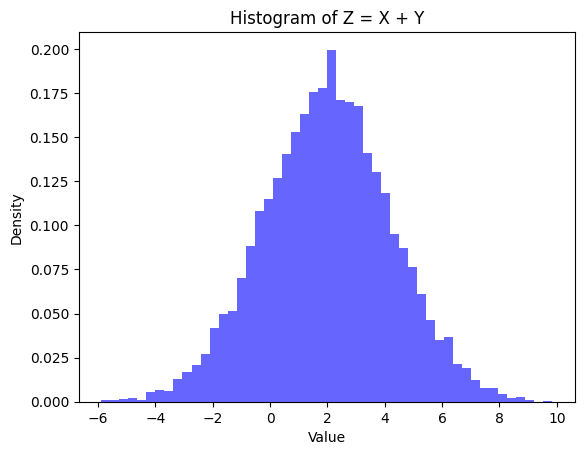

In [79]:
mu1, sigma1 = 3, 2
mu2, sigma2 = -1, 1

X = torch.distributions.Normal(mu1, sigma1).sample((10000,))
Y = torch.distributions.Normal(mu2, sigma2).sample((10000,))
Z = X + Y

empirical_mean = Z.mean().item()
empirical_variance = Z.var().item()

theoretical_mean = mu1 + mu2
theoretical_variance = sigma1**2 + sigma2**2

print(f"Theoretical Mean of Z: {theoretical_mean}")
print(f"Empirical Mean of Z: {empirical_mean}")
print(f"Theoretical Variance of Z: {theoretical_variance}")
print(f"Empirical Variance of Z: {empirical_variance}")

plt.hist(Z.numpy(), bins=50, density=True, alpha=0.6, color='b')
plt.title("Histogram of Z = X + Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# 17. **Transformation of Random Variables**

#### Q1. (**Mandatory**)

Original Distribution -> Mean: 0.5013436675071716, Variance: 0.08285296708345413
Transformed Distribution -> Mean: 4.002686977386475, Variance: 0.33141186833381653


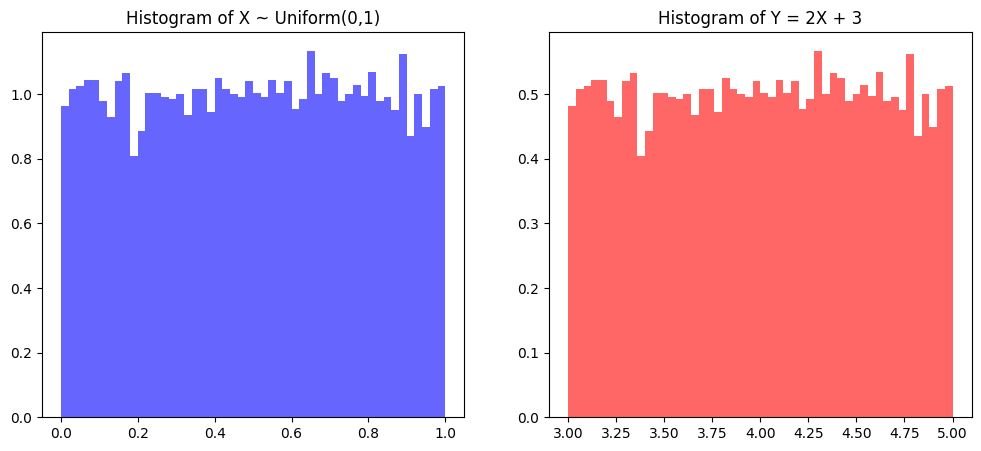

In [80]:
X = torch.distributions.Uniform(0, 1).sample((10000,))
Y = 2 * X + 3

mean_X, var_X = X.mean().item(), X.var().item()
mean_Y, var_Y = Y.mean().item(), Y.var().item()

print(f"Original Distribution -> Mean: {mean_X}, Variance: {var_X}")
print(f"Transformed Distribution -> Mean: {mean_Y}, Variance: {var_Y}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
axes[0].hist(X.numpy(), bins=50, color='b', alpha=0.6, density=True)
axes[0].set_title("Histogram of X ~ Uniform(0,1)")
    
axes[1].hist(Y.numpy(), bins=50, color='r', alpha=0.6, density=True)
axes[1].set_title("Histogram of Y = 2X + 3")

plt.show()

#### Q2. (Optional)

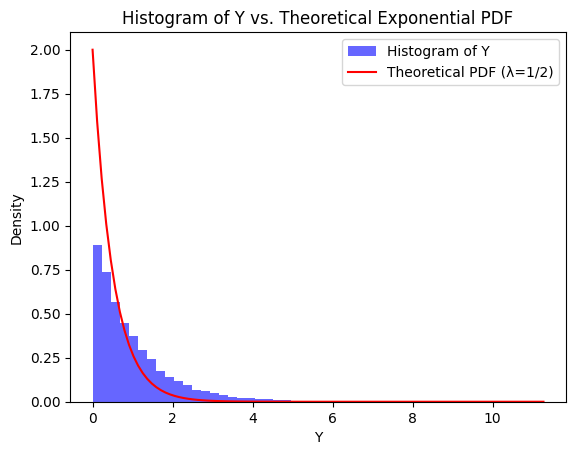

In [81]:
X = torch.distributions.Uniform(0, 1).sample((10000,))
Y = -torch.log(X)

lambda_param = 1 / 2
y_values = torch.linspace(0, Y.max(), 100)
pdf_values = (1 / lambda_param) * torch.exp(-y_values / lambda_param)

plt.hist(Y.numpy(), bins=50, density=True, alpha=0.6, color='b', label="Histogram of Y")
plt.plot(y_values.numpy(), pdf_values.numpy(), 'r-', label="Theoretical PDF (λ=1/2)")
    
plt.title("Histogram of Y vs. Theoretical Exponential PDF")
plt.xlabel("Y")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Q3. (Optional)

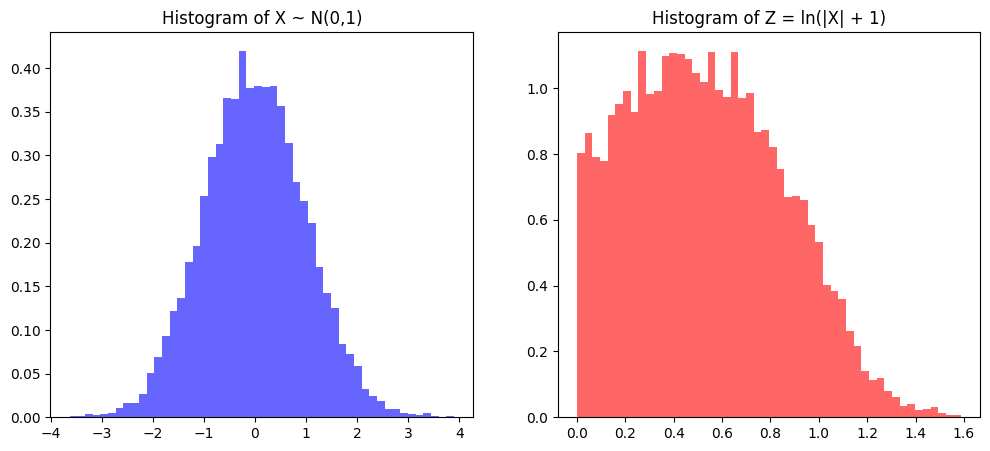

In [82]:
X = torch.distributions.Normal(0, 1).sample((10000,))
Z = torch.log(torch.abs(X) + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(X.numpy(), bins=50, density=True, alpha=0.6, color='b')
axes[0].set_title("Histogram of X ~ N(0,1)")

axes[1].hist(Z.numpy(), bins=50, density=True, alpha=0.6, color='r')
axes[1].set_title("Histogram of Z = ln(|X| + 1)")

plt.show()

# 18. **Generating Random Numbers**

#### Q1. (**Mandatory**)

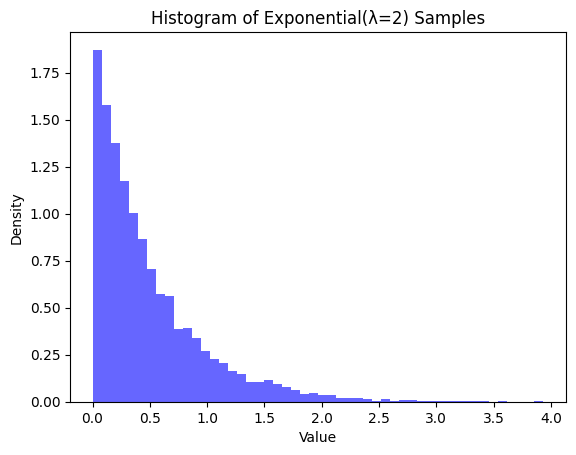

In [83]:
X = torch.distributions.Uniform(0, 1).sample((10000,))
lam = 2
Y = -torch.log(X) / lam

plt.hist(Y.numpy(), bins=50, density=True, alpha=0.6, color='b')
plt.title("Histogram of Exponential(λ=2) Samples")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

#### Q2. (Optional)

In [84]:
U = torch.distributions.Uniform(0, 1).sample()
lam = 3
X = -torch.log(1 - U) / lam
print(X.item())

0.6990179419517517


#### Q3. (Optional)

In [85]:
def analyze_transformed_exponential(N, lam, t):
    U = torch.distributions.Uniform(0, 1).sample((N,))
    X = -torch.log(1 - U) / lambda_param
    Z = X ** 2

    proportion_exceeding_t = (Z > t).float().mean().item()
    mean_X, var_X = X.mean().item(), X.var().item()
    mean_Z, var_Z = Z.mean().item(), Z.var().item()

    return proportion_exceeding_t, (mean_X, var_X), (mean_Z, var_Z)

N = 10000
lam = 5
t = 0.5
result = analyze_transformed_exponential(N, lam, t)
print("Proportion of Z > t:", result[0])
print("Mean and Variance of X:", result[1])
print("Mean and Variance of Z:", result[2])

Proportion of Z > t: 0.6916000247001648
Mean and Variance of X: (1.977128267288208, 3.972968101501465)
Mean and Variance of Z: (7.881608009338379, 321.79449462890625)
